# 01. Знакомство с `torch.Tensor`

V 0.1 04.02.2021

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [2]:
!pip install torch

In [3]:
import torch

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

In [4]:
t = torch.tensor([[1, 2], [3, 4]])
t 

tensor([[1, 2],
        [3, 4]])

In [5]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [10]:
t = torch.zeros(8, 8)
t[0] = torch.tensor([-4., -3., -2., -6., -5., -2., -3., -4.])
t[-2] = torch.ones(1, 8)
t[1] = torch.ones(1, 8) * (-1)
t[-1] =  t[0] * (-1)
t

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]])

1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [11]:
t = torch.arange(2, 22)
even = t[::2]
odd = t[1::2]
odd * even

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])

1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [12]:
t = torch.arange(1, 111)
t = t.reshape(11, 10)
t[::, :7:]

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [14]:
# метод repeat
n, m = 4, 5
def repeat_mask(n, m):
    t = torch.tensor([[0, 1], [2, 3]])
    res = t.repeat(n, m)[:n:, :m:]
    return res

In [15]:
repeat_mask(5, 5)

tensor([[0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0]])

1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

In [16]:
t = torch.rand(4, 7) * 20
M = t.max()
m = t.min()
a = 1 / (M - m)
b = -m / (M - m)
# aX + b (X = t)
a * t + b

tensor([[0.5525, 0.6132, 0.3154, 0.5144, 0.7958, 0.2835, 0.4056],
        [0.7385, 0.7813, 1.0000, 0.9447, 0.6988, 0.7352, 0.4188],
        [0.2152, 0.3125, 0.7328, 0.6321, 0.1015, 0.1825, 0.1331],
        [0.4418, 0.5932, 0.3867, 0.3462, 0.0420, 0.0152, 0.0000]])

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в тензорах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [17]:
ar1 = torch.rand(4, 7) * 10
ar2 = torch.rand(4, 7) * 10

torch.manual_seed(0)
print(ar1)
print(ar2)


tensor([[8.4984, 8.0331, 9.8679, 9.2275, 3.4102, 9.5058, 3.9191],
        [5.7109, 1.0149, 1.0530, 9.6674, 0.0318, 5.5822, 3.2699],
        [7.7222, 8.6231, 9.5970, 7.3538, 5.3416, 5.3834, 6.8912],
        [9.9261, 4.4033, 6.7375, 9.6861, 0.0686, 0.3390, 3.4540]])
tensor([[4.5072, 7.4451, 4.8080, 6.5693, 7.5714, 5.8842, 8.6508],
        [9.1160, 5.1967, 0.2387, 4.1114, 9.0962, 8.0662, 4.5158],
        [0.6715, 2.5430, 7.4570, 2.9410, 5.5942, 9.6500, 7.1726],
        [4.0584, 0.1526, 3.4986, 5.9836, 5.4607, 8.8104, 8.9841]])


In [18]:
ar1 * (ar1 >= ar2)

tensor([[8.4984, 8.0331, 9.8679, 9.2275, 0.0000, 9.5058, 0.0000],
        [0.0000, 0.0000, 1.0530, 9.6674, 0.0000, 0.0000, 0.0000],
        [7.7222, 8.6231, 9.5970, 7.3538, 0.0000, 0.0000, 0.0000],
        [9.9261, 4.4033, 6.7375, 9.6861, 0.0000, 0.0000, 0.0000]])

In [19]:
ar2 * (ar1 < ar2)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 7.5714, 0.0000, 8.6508],
        [9.1160, 5.1967, 0.0000, 0.0000, 9.0962, 8.0662, 4.5158],
        [0.0000, 0.0000, 0.0000, 0.0000, 5.5942, 9.6500, 7.1726],
        [0.0000, 0.0000, 0.0000, 0.0000, 5.4607, 8.8104, 8.9841]])

In [20]:
res = ar1 * (ar1 >= ar2) + ar2 * (ar1 < ar2)

res.sort()

torch.return_types.sort(
values=tensor([[7.5714, 8.0331, 8.4984, 8.6508, 9.2275, 9.5058, 9.8679],
        [1.0530, 4.5158, 5.1967, 8.0662, 9.0962, 9.1160, 9.6674],
        [5.5942, 7.1726, 7.3538, 7.7222, 8.6231, 9.5970, 9.6500],
        [4.4033, 5.4607, 6.7375, 8.8104, 8.9841, 9.6861, 9.9261]]),
indices=tensor([[4, 1, 0, 6, 3, 5, 2],
        [2, 6, 1, 5, 4, 0, 3],
        [4, 6, 3, 0, 1, 2, 5],
        [1, 4, 2, 5, 6, 3, 0]]))

1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [38]:
t = torch.randint(0, 101, (1, 20))
t.sort()

torch.return_types.sort(
values=tensor([[ 0,  1,  8,  9, 27, 32, 41, 42, 45, 55, 61, 74, 79, 83, 85, 93, 93, 94,
         98, 99]]),
indices=tensor([[ 3, 10, 14, 12, 15, 13,  8, 16,  9, 11, 18,  2, 19,  1,  0,  4,  7, 17,
          5,  6]]))

In [39]:
#значение
print(t.sort()[0][0][1])
#id
print(t.sort()[1][0][1])

tensor(1)
tensor(10)


## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [69]:
a = torch.arange(0,101,10).reshape(-1,1)
b = torch.arange(1,8)
a+b

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [71]:
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]]) 
b_1d = torch.tensor([1,2,3])

In [77]:
a_2d - b_1d.reshape(-1,1)

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])

In [78]:
torch.transpose(a_2d, 0, 1) - b_1d

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])

## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
tensor([1, 3, 5, 7])
```

In [79]:
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])

In [84]:
torch.where(a == b)[0]

tensor([1, 3, 5, 7])

1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
tensor([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [87]:
a = torch.arange(9).view(3,3)
a

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [96]:
torch.flip(a, [0, 1])

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
```

Ожидается результат:

```python
tensor([6, 9, 10])
```

In [97]:
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])

In [109]:
a[torch.where((a>=5) & (a<=10))]

tensor([ 6,  9, 10])

1.3.4 Поменять местами столбец 1 и 2 тензора `torch.arange(9).reshape(3,3)`

In [112]:
a = torch.arange(9).view(3,3)
a

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [118]:
a[:,[1,2]] = a[:,[1,2]].flip([1])
a

tensor([[0, 2, 1],
        [3, 5, 4],
        [6, 8, 7]])

1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [123]:
a = torch.randint(0,10,(8,10))
a

tensor([[1, 0, 1, 0, 9, 1, 4, 2, 5, 3],
        [4, 1, 5, 5, 5, 1, 5, 2, 4, 3],
        [4, 7, 8, 4, 7, 3, 1, 5, 3, 0],
        [5, 3, 3, 0, 8, 7, 3, 4, 7, 3],
        [5, 6, 0, 4, 9, 8, 2, 0, 0, 6],
        [8, 9, 1, 9, 2, 6, 9, 9, 7, 4],
        [1, 8, 5, 8, 7, 9, 7, 4, 5, 4],
        [2, 5, 8, 3, 8, 0, 1, 2, 0, 2]])

In [143]:
max_index = a.sum(dim=[1]).argmin()
max_index

tensor(0)

In [144]:
a[max_index]

tensor([1, 0, 1, 0, 9, 1, 4, 2, 5, 3])

1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [148]:
a = torch.randint(0,100, (20,))
a

tensor([67, 23, 76, 92, 30, 21, 83, 73, 26, 62, 29, 16,  6, 63, 16, 70,  8, 95,
        90, 37])

In [154]:
a = torch.where(a<30, 30, a)
a = torch.where(a>70, 70, a)
a

tensor([67, 30, 70, 70, 30, 30, 70, 70, 30, 62, 30, 30, 30, 63, 30, 70, 30, 70,
        70, 37])

1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [168]:
a = torch.randint(0, 10, (30,3))
b = torch.randint(0, 10, (30,3))

In [161]:
a[torch.where(a > b)]

tensor([2, 9, 2, 2, 9, 4, 6, 8, 7, 8, 3, 7, 8, 4, 8, 7, 7, 5, 3, 7, 7, 9, 7, 7,
        5, 2, 7, 6, 8, 6, 5, 7, 3, 4, 7])

In [164]:
a[torch.where(a > b)].sum()

tensor(236)

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [187]:
a = torch.randint(0, 10, (20,20))
a

tensor([[1, 5, 3, 7, 2, 6, 7, 3, 6, 2, 7, 6, 4, 5, 6, 2, 8, 2, 6, 4],
        [9, 5, 3, 8, 4, 1, 6, 7, 6, 5, 9, 7, 5, 1, 7, 0, 4, 2, 1, 4],
        [3, 6, 7, 9, 4, 9, 9, 9, 4, 1, 0, 3, 3, 5, 9, 1, 9, 6, 4, 7],
        [3, 3, 3, 0, 8, 6, 5, 6, 6, 9, 6, 2, 0, 7, 8, 1, 1, 8, 2, 4],
        [2, 2, 2, 1, 1, 9, 6, 0, 8, 7, 1, 8, 7, 7, 7, 8, 3, 4, 3, 3],
        [9, 4, 2, 2, 4, 6, 0, 7, 6, 9, 6, 6, 6, 0, 4, 5, 0, 5, 8, 0],
        [3, 7, 2, 3, 2, 3, 9, 9, 9, 4, 1, 5, 7, 7, 1, 9, 5, 2, 2, 8],
        [5, 6, 1, 7, 4, 7, 5, 4, 5, 8, 7, 3, 4, 5, 8, 7, 8, 6, 7, 2],
        [9, 1, 9, 8, 0, 3, 9, 1, 9, 9, 4, 7, 5, 6, 9, 7, 2, 9, 1, 9],
        [8, 4, 3, 7, 8, 2, 7, 6, 8, 3, 2, 4, 1, 1, 1, 8, 6, 7, 7, 4],
        [9, 5, 3, 5, 7, 4, 8, 1, 5, 8, 0, 4, 8, 3, 9, 5, 3, 9, 9, 4],
        [5, 1, 5, 3, 6, 8, 6, 2, 7, 5, 2, 6, 8, 2, 7, 7, 4, 7, 8, 8],
        [4, 9, 8, 5, 7, 5, 7, 8, 9, 5, 0, 2, 8, 1, 9, 4, 1, 5, 8, 3],
        [4, 8, 6, 5, 3, 1, 3, 6, 8, 1, 6, 6, 1, 5, 0, 1, 4, 3, 8, 8],
        [9, 8, 6, 7,

In [195]:
i = torch.arange(min(a.shape))
shift = 4
a[(i[:-1-shift], (i+shift)[:-1-shift])]

tensor([2, 1, 9, 6, 8, 9, 1, 3, 5, 1, 9, 7, 1, 3, 3])

1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [208]:
ar1 = torch.randint(0, 10, (5,10))
ar2 = torch.randint(0, 10, (5,10))
ar1, ar2

(tensor([[2, 1, 0, 6, 0, 9, 2, 2, 4, 7],
         [1, 4, 8, 8, 8, 6, 7, 9, 4, 7],
         [8, 9, 3, 0, 5, 5, 1, 1, 4, 5],
         [8, 2, 5, 8, 2, 2, 8, 6, 7, 6],
         [2, 5, 3, 5, 5, 5, 0, 4, 6, 8]]),
 tensor([[4, 4, 3, 9, 1, 2, 6, 5, 5, 5],
         [6, 5, 9, 1, 9, 0, 5, 5, 7, 5],
         [5, 0, 8, 8, 3, 1, 1, 9, 4, 6],
         [7, 2, 3, 6, 7, 7, 2, 4, 2, 0],
         [3, 0, 7, 6, 5, 9, 8, 3, 3, 0]]))

In [209]:
ar1.where(ar1!=ar2, ar1**2)

tensor([[ 2,  1,  0,  6,  0,  9,  2,  2,  4,  7],
        [ 1,  4,  8,  8,  8,  6,  7,  9,  4,  7],
        [ 8,  9,  3,  0,  5,  5,  1,  1, 16,  5],
        [ 8,  4,  5,  8,  2,  2,  8,  6,  7,  6],
        [ 2,  5,  3,  5, 25,  5,  0,  4,  6,  8]])

1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [212]:
ar1 = torch.randint(0, 10, (4,7))
ar2 = torch.randint(0, 10, (4,7))
ar3 = torch.randint(0, 10, (4,7))
ar1, ar2, ar3

(tensor([[1, 2, 9, 5, 7, 7, 3],
         [2, 8, 2, 8, 9, 1, 2],
         [3, 6, 9, 6, 5, 0, 2],
         [2, 0, 3, 8, 7, 3, 6]]),
 tensor([[2, 7, 6, 9, 0, 4, 3],
         [9, 9, 4, 9, 0, 9, 2],
         [7, 6, 3, 2, 1, 5, 9],
         [8, 2, 1, 2, 0, 2, 1]]),
 tensor([[9, 3, 3, 8, 2, 9, 1],
         [7, 9, 7, 3, 5, 7, 3],
         [6, 9, 1, 0, 0, 5, 0],
         [6, 1, 0, 8, 7, 9, 9]]))

In [213]:
torch.where((ar1>ar2) & (ar1<ar3), 0, ar1)

tensor([[1, 2, 9, 5, 7, 0, 3],
        [2, 8, 2, 8, 9, 1, 2],
        [3, 6, 9, 6, 5, 0, 2],
        [2, 0, 3, 8, 7, 0, 0]])

1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [215]:
ar1 = torch.randint(0, 20, (20,5))
ar1

tensor([[14, 13, 14,  4, 16],
        [ 4, 12, 19, 17,  1],
        [ 1,  1, 10,  2,  6],
        [12, 11, 13,  3,  1],
        [17,  6, 16,  8,  3],
        [16, 18, 13, 15, 14],
        [ 1,  0, 11,  3,  9],
        [ 4,  3,  0,  0, 17],
        [10, 12,  7,  7, 15],
        [19, 17, 12, 13,  2],
        [ 0,  0, 16, 18,  1],
        [16,  0,  7, 10, 11],
        [ 7,  9, 15, 18, 18],
        [16,  9, 12,  3, 12],
        [ 6,  2, 11, 16, 10],
        [ 6,  5,  0,  8,  5],
        [ 6, 13,  9, 13, 18],
        [11,  3, 11,  5, 19],
        [12,  7, 10,  9, 13],
        [ 7,  1,  5, 13, 17]])

In [229]:
torch.where((ar1 == ar1.max(dim=1).values.reshape(-1,1)).sum(dim=[0]) >= 5)[0]

tensor([4])

1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива. 

In [261]:
ar1 = torch.rand(4,7)
ar1

tensor([[0.5491, 0.0699, 0.9825, 0.4995, 0.2330, 0.5119, 0.2854],
        [0.6379, 0.6810, 0.3582, 0.5291, 0.7975, 0.1748, 0.3885],
        [0.4262, 0.1692, 0.5407, 0.5184, 0.0961, 0.6026, 0.9772],
        [0.7659, 0.2288, 0.9577, 0.1563, 0.2458, 0.7205, 0.8978]])

In [262]:
max_ind = ar1.argmax()
row = max_ind // ar1.shape[-1]
col = max_ind % ar1.shape[-1]
ar1[row+1:, col+1:] = 0
ar1

tensor([[0.5491, 0.0699, 0.9825, 0.4995, 0.2330, 0.5119, 0.2854],
        [0.6379, 0.6810, 0.3582, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4262, 0.1692, 0.5407, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7659, 0.2288, 0.9577, 0.0000, 0.0000, 0.0000, 0.0000]])

1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [280]:
a = torch.tensor([2, 3, 2, 2, 2, 1])

In [281]:
torch.where(
    torch.arange(1, a.max()+1).repeat(a.shape[0], 1) == a.reshape(-1,1),
    1.0,
    0.0
)

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре. 
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая. 

In [286]:
arr = torch.randint(0, 100, (20,))
arr

tensor([48, 40, 29,  5, 87, 55,  8,  8, 64, 23, 50, 49, 64, 15, 47, 33,  2, 80,
        73, 47])

In [304]:
val_c = arr.unique(return_counts=True)
max_c = val_c[1].sort(descending=True)[0][0]
val_max_c = val_c[0][val_c[1] == max_c]
val_max_c

tensor([ 8, 47, 64])

In [305]:
torch.where(torch.isin(arr, val_max_c))

(tensor([ 6,  7,  8, 12, 14, 19]),)

## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [315]:
n = 10_000
arr = torch.linspace(0, 10, n)

In [316]:
((arr * torch.sin(arr)) > 0.5).sum() / n

tensor(0.5241)

1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

In [376]:
n = 100
a = torch.arange(2, n+1)
p = 2
mask = ~torch.isnan(a)
while 2*p <= (n+1):
    mask = mask & ~torch.isin(a, torch.arange(2*p, n+1, p))
    p = a[mask][a[mask] > p][0]

a[mask]

tensor([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61,
        67, 71, 73, 79, 83, 89, 97])

1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [385]:
x = torch.randint(0,10, (20,))
y = torch.randint(0,10, (20,))
(((x-y)**2).sum()**(1/2)).item(), torch.dist(x*1.0, y*1.0).item()

(17.72004508972168, 17.72004508972168)

1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100. 
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

In [387]:
a = torch.randint(0, 100, (20,3))
a

tensor([[46, 37, 31],
        [87, 30,  9],
        [67, 70, 51],
        [22, 38, 13],
        [76, 51, 71],
        [67, 11,  3],
        [11,  6, 22],
        [54, 48, 15],
        [86, 61, 67],
        [71,  8, 33],
        [49, 32, 24],
        [98,  0, 71],
        [45, 90, 60],
        [25, 52,  6],
        [55, 57, 28],
        [10, 99, 12],
        [11, 27, 34],
        [57, 21,  4],
        [17, 64, 16],
        [65, 72, 75]])

In [397]:
a[torch.linalg.norm(a*1.0, dim=1).sort().indices]

tensor([[11,  6, 22],
        [11, 27, 34],
        [22, 38, 13],
        [25, 52,  6],
        [57, 21,  4],
        [49, 32, 24],
        [46, 37, 31],
        [67, 11,  3],
        [17, 64, 16],
        [54, 48, 15],
        [71,  8, 33],
        [55, 57, 28],
        [87, 30,  9],
        [10, 99, 12],
        [67, 70, 51],
        [76, 51, 71],
        [45, 90, 60],
        [98,  0, 71],
        [65, 72, 75],
        [86, 61, 67]])

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

In [399]:
a = torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])
a

tensor([1, 3, 7, 1, 2, 6, 0, 1])

In [407]:
left = a.diff()[:-1]
left

tensor([ 2,  4, -6,  1,  4, -6])

In [408]:
right = a.flip(0).diff().flip(0)[1:]
right

tensor([-4,  6, -1, -4,  6, -1])

In [421]:
((((left>0) & (right>0)).nonzero()+1).t()[0])

tensor([2, 5])

1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [423]:
a = torch.rand(100)
a

tensor([0.9082, 0.3230, 0.3467, 0.1644, 0.5192, 0.9667, 0.7045, 0.8514, 0.4669,
        0.4206, 0.4107, 0.7852, 0.4344, 0.0729, 0.3244, 0.6957, 0.9875, 0.4091,
        0.0647, 0.1318, 0.1066, 0.7016, 0.8686, 0.6479, 0.6724, 0.8257, 0.8419,
        0.7986, 0.7796, 0.6353, 0.7581, 0.1569, 0.1764, 0.6345, 0.5778, 0.0604,
        0.1358, 0.1020, 0.8971, 0.8269, 0.2368, 0.5754, 0.3850, 0.9347, 0.0471,
        0.1352, 0.0837, 0.7910, 0.2501, 0.7978, 0.6690, 0.2556, 0.3653, 0.2977,
        0.7206, 0.2995, 0.6697, 0.5357, 0.1007, 0.1857, 0.1533, 0.7620, 0.6083,
        0.4874, 0.2023, 0.0046, 0.3231, 0.1173, 0.0027, 0.0231, 0.1734, 0.0139,
        0.6559, 0.6871, 0.7015, 0.0023, 0.8092, 0.5975, 0.7557, 0.3771, 0.7401,
        0.0258, 0.6703, 0.8965, 0.7102, 0.0287, 0.3596, 0.4379, 0.7620, 0.3108,
        0.5719, 0.3245, 0.4206, 0.4900, 0.2129, 0.1530, 0.9128, 0.9201, 0.4849,
        0.9328])

In [426]:
x = torch.rand(1).item()
x

0.30132049322128296

In [429]:
a[torch.abs(a-x).argmin()]

tensor(0.2995)

1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [437]:
A = torch.tensor([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]).to(torch.float)
B = torch.tensor([[3, -1], [2, 1]]).to(torch.float)
C = torch.tensor([[7, 21], [11, 8], [8, 4]]).to(torch.float)

In [439]:
(A.inverse() @ ((-1)*C) @ B.inverse()).round()

tensor([[ 1., -0.],
        [-2.,  1.],
        [ 3., -4.]])

1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

In [442]:
torch.tensor([
    [3,-3,0,7],
    [2,2,4,7],
    [1,2,3,4],
    [5,-4,1,3]
]).to(torch.float).det().round()

tensor(0.)

In [ ]:
#линейно зависимы

1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами. 

In [481]:
norm = torch.normal(mean=torch.zeros(200), std=10)
norm

tensor([  0.2535, -14.1012,   9.7281,  10.0815,  17.5917,  22.5962,  11.4083,
        -14.1003,  -9.7739,  -6.4262,   3.1405,   0.2520,   3.8452,   8.9965,
        -10.8906,   3.1812,   1.0379,  -9.2349,  10.8367,   5.4086,  -0.6683,
         -7.4773,  11.4979,  -8.6641,   5.6773,  10.1238,  -4.7169,   3.9211,
          1.9778,  11.6353,  -3.0839,  -1.6792,   6.9005,   8.3189,  10.1591,
          5.5679,   1.6752,  -9.9427, -22.9217, -10.7103, -17.8882,   7.1064,
         -2.5203,  16.6027,  -8.4094, -14.8461,  -5.3639, -11.3347,   0.5670,
        -25.4328,  11.2299,   8.7331,   9.9661,  -8.2726,   2.8943, -11.5855,
          1.2550, -10.5956,   0.1635,  22.5747,   6.6531,  -1.3466,  18.0805,
          0.7952,  -2.3472,   3.6010,  10.3072,  -4.8060,   3.4347,  -8.8315,
         -8.2494,  -4.0604,  -4.4734,   1.1745,  -3.2449,  11.8576, -19.5226,
         -1.3468,  25.9802,   3.7748,  -6.2845, -17.5011,   8.8726, -26.5612,
         -9.7530,   7.4974,  -4.9692, -11.1055,  -5.9708,   4.62

In [482]:
bins20 = norm.histc(bins=20)
bins20

tensor([ 1.,  3.,  2.,  4.,  3.,  6., 19., 14., 17., 16., 26., 25., 14., 22.,
        10.,  6.,  6.,  4.,  1.,  1.])

In [483]:
import matplotlib.pyplot as plt

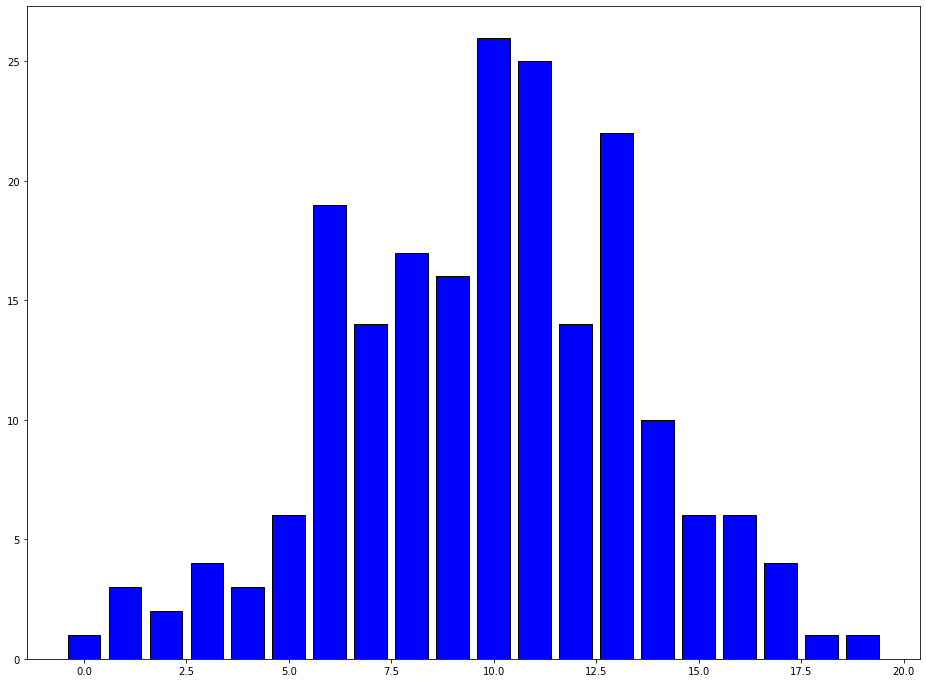

In [484]:
plt.figure(figsize=(16,12))
plt.bar(
    torch.arange(20),
    bins20,
    color = 'blue',
    edgecolor = 'black'
);